In [46]:
import pandas as pd

# Charger un fichier SAS (.sas7bdat)
df = pd.read_sas("../data/raw/credit.sas7bdat", format="sas7bdat", encoding="latin1")

# Afficher les premières lignes
print(df.head())

   Cle  Comptes  Duree_credit Historique_credit Objet_credit  Montant_credit  \
0  1.0      1.0           6.0               A34          A43          1169.0   
1  2.0      2.0          48.0               A32          A43          5951.0   
2  3.0      4.0          12.0               A34          A46          2096.0   
3  4.0      1.0          42.0               A32          A42          7882.0   
4  5.0      1.0          24.0               A33          A40          4870.0   

   Epargne  Anciennete_emploi  Taux_effort Situation_familiale  ...  \
0      0.0                5.0          4.0                 A93  ...   
1      1.0                3.0          2.0                 A92  ...   
2      1.0                4.0          2.0                 A93  ...   
3      1.0                4.0          2.0                 A93  ...   
4      1.0                3.0          3.0                 A93  ...   

  Anciennete_domicile  Biens   Age  Autres_credits Statut_domicile Nb_credits  \
0          

In [47]:
#Recoder la variable Cible en 0 et 1 
df['Cible'] = df['Cible'].map({1: 0, 2: 1})

In [48]:
#Voir la nature des variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cle                  1000 non-null   float64
 1   Comptes              1000 non-null   float64
 2   Duree_credit         1000 non-null   float64
 3   Historique_credit    1000 non-null   object 
 4   Objet_credit         1000 non-null   object 
 5   Montant_credit       1000 non-null   float64
 6   Epargne              1000 non-null   float64
 7   Anciennete_emploi    1000 non-null   float64
 8   Taux_effort          1000 non-null   float64
 9   Situation_familiale  1000 non-null   object 
 10  Garanties            1000 non-null   object 
 11  Anciennete_domicile  1000 non-null   float64
 12  Biens                1000 non-null   object 
 13  Age                  1000 non-null   float64
 14  Autres_credits       1000 non-null   object 
 15  Statut_domicile      1000 non-null   ob

In [ ]:
#Analyse des valeurs manquantes
df.isnull().sum() #pas de valeurs manquantes

Cle                    0
Comptes                0
Duree_credit           0
Historique_credit      0
Objet_credit           0
Montant_credit         0
Epargne                0
Anciennete_emploi      0
Taux_effort            0
Situation_familiale    0
Garanties              0
Anciennete_domicile    0
Biens                  0
Age                    0
Autres_credits         0
Statut_domicile        0
Nb_credits             0
Type_emploi            0
Nb_pers_charge         0
Telephone              0
Cible                  0
dtype: int64

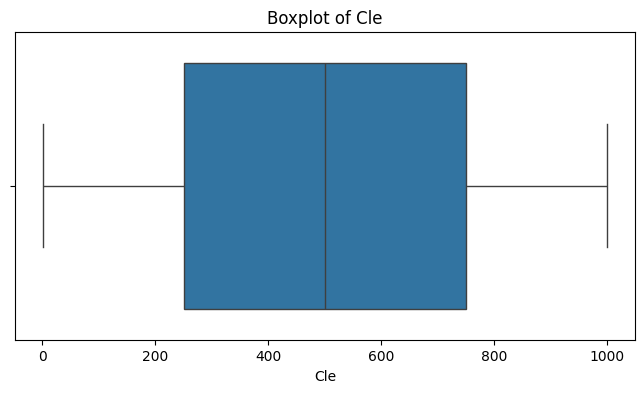

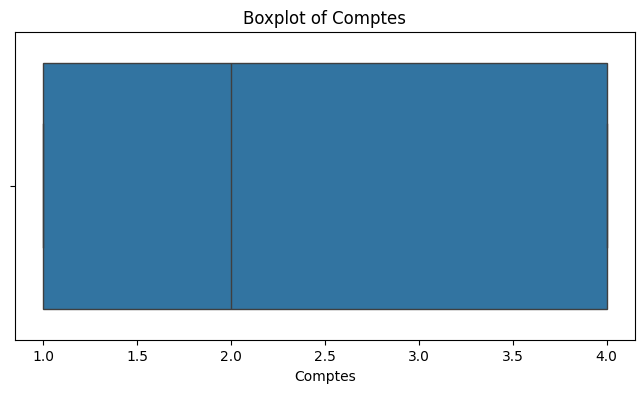

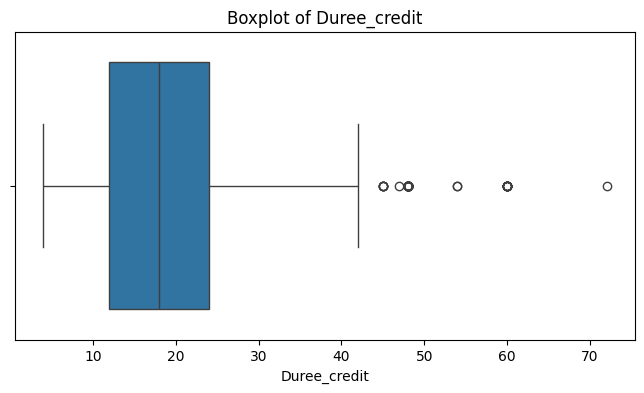

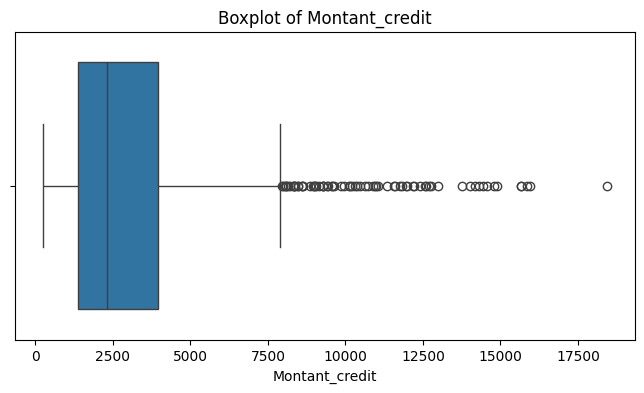

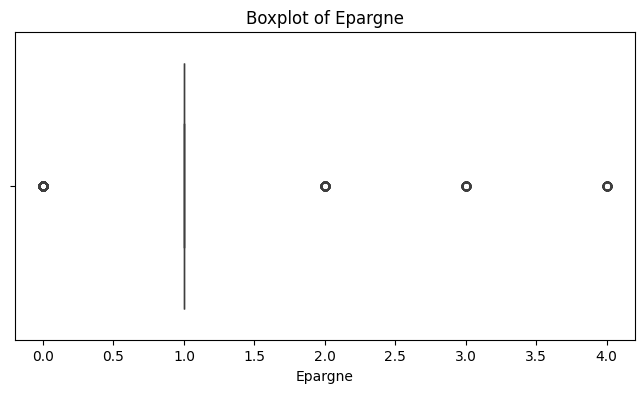

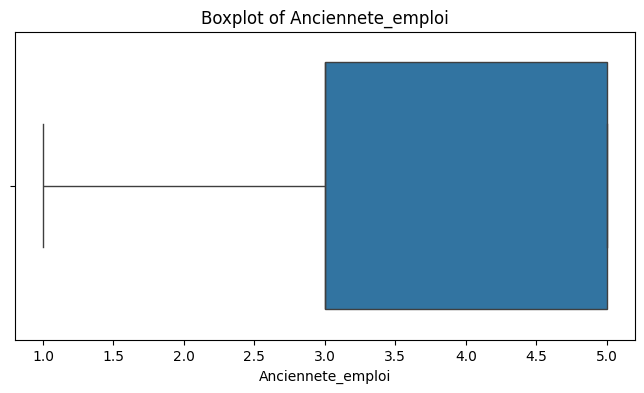

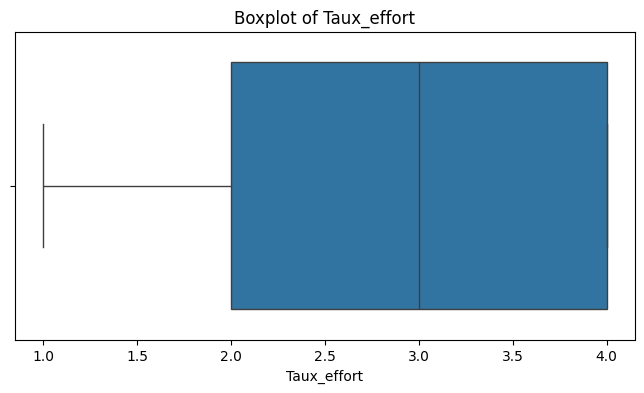

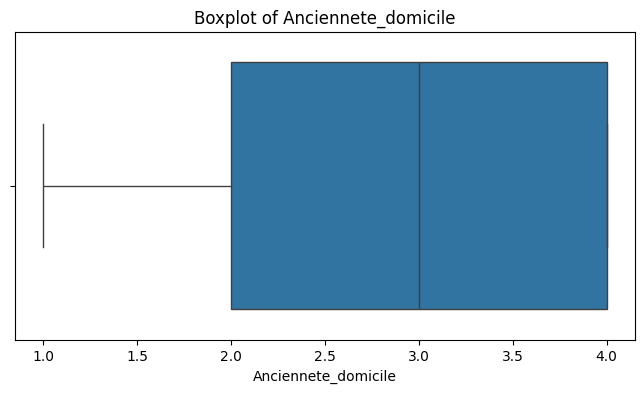

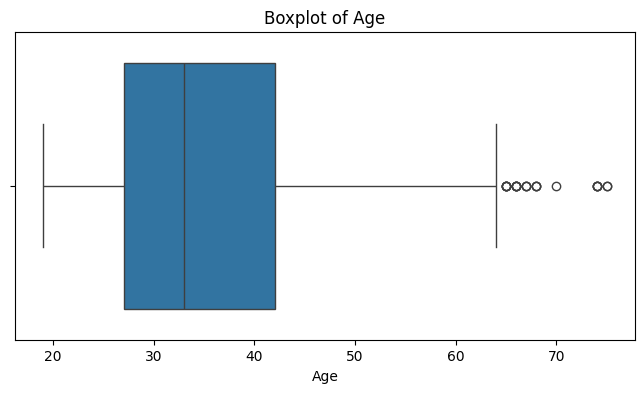

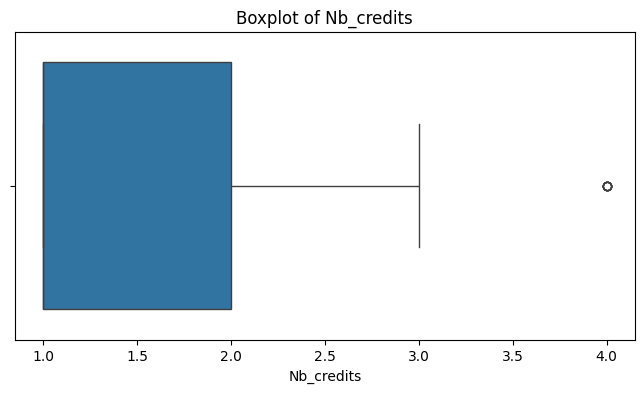

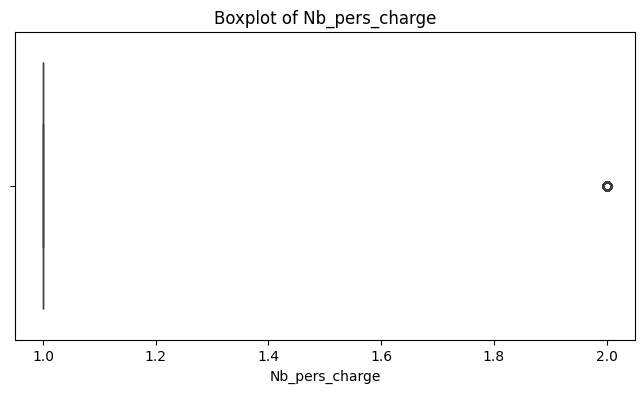

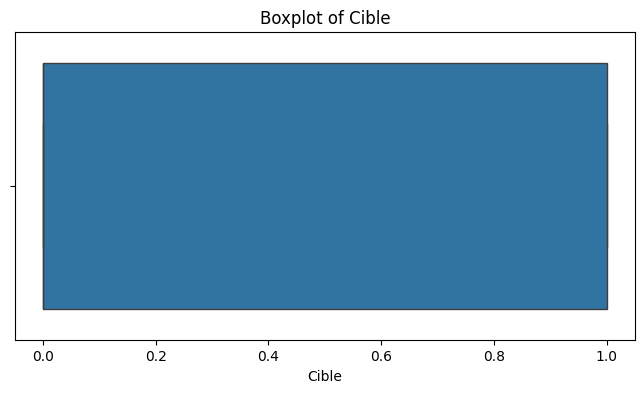

In [19]:
#Analyse des outliers
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [49]:
# Vérifier la présence d'outliers sur les variables

# Duree_credit
from scikit_posthocs import outliers_gesd
no_outlier = outliers_gesd(df["Duree_credit"], alpha=0.05, hypo=False)
len(no_outlier) # 1 outliers
df = df[df["Duree_credit"] != df["Duree_credit"].max()]

In [50]:
# Montant_credit
no_outlier = outliers_gesd(df["Montant_credit"], alpha=0.05, hypo=False)
len(no_outlier) # 5 outliers
df = df.drop(df.nlargest(5, "Montant_credit").index)


In [51]:
#Age
no_outlier = outliers_gesd(df["Age"], alpha=0.05, hypo=False)
len(no_outlier) # pas outliers

994

In [ ]:
#Nb_credit
no_outlier = outliers_gesd(df["Nb_credits"], alpha=0.05, hypo=False)
len(no_outlier) # 1 outliers
df = df[df["Nb_credits"] != 4] #enlève 6 


In [ ]:
#Nb_pers_charge
no_outlier = outliers_gesd(df["Nb_pers_charge"], alpha=0.05, hypo=False)
len(no_outlier) # pas outliers


988

In [58]:
df.shape

(988, 21)

In [59]:
%store df

Stored 'df' (DataFrame)
